# [과제 3] 로지스틱 회귀분석
### - sklearn 패키지를 사용해 로지스틱 회귀분석을 진행해주세요.
### - 성능지표를 계산하고 이에 대해 해석해주세요.
### - 성능 개선을 시도해주세요. (어떠한 성능지표를 기준으로 개선을 시도했는지, 그 이유도 함께 적어주세요.)
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

# sklearn 패키지
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# 데이터 불균형 관련
from imblearn.under_sampling import *
from imblearn.over_sampling import *

In [28]:
data = pd.read_csv("assignment3_creditcard.csv")

In [29]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28678 entries, 0 to 28677
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      28678 non-null  float64
 1   V2      28678 non-null  float64
 2   V3      28678 non-null  float64
 3   V4      28678 non-null  float64
 4   V5      28678 non-null  float64
 5   V6      28678 non-null  float64
 6   V7      28678 non-null  float64
 7   V8      28678 non-null  float64
 8   V9      28678 non-null  float64
 9   V10     28678 non-null  float64
 10  V11     28678 non-null  float64
 11  V12     28678 non-null  float64
 12  V13     28678 non-null  float64
 13  V14     28678 non-null  float64
 14  V15     28678 non-null  float64
 15  V16     28678 non-null  float64
 16  V17     28678 non-null  float64
 17  V18     28678 non-null  float64
 18  V19     28678 non-null  float64
 19  V20     28678 non-null  float64
 20  V21     28678 non-null  float64
 21  V22     28678 non-null  float64
 22

In [31]:
# 결측치 확인
data.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
Class    0
dtype: int64

## 로지스틱 회귀 분석

In [32]:
# 회귀 모델에 넣을 변수 데이터를 마련한다.
Y = data['Class']
X = data.drop(['Class'], axis=1)

# train_test_split 함수를 통해, 75 : 25 비율로 train : test 셋을 마련한다
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, shuffle=True)

# 회귀 모델은 sklearn 패키지를 활용.
model = LogisticRegression()
model.fit(X_train, Y_train)
pred = model.predict(X_test)

In [33]:
# 우선적으로 학습시킨 모델의 정확도를 출력.
print('Train Set에 대한 정확도 : %0.5f' % model.score(X_train, Y_train))
print('Test  Set에 대한 정확도 : %0.5f' % model.score(X_test, Y_test))

Train Set에 대한 정확도 : 0.99847
Test  Set에 대한 정확도 : 0.99735


정확도가 매우매우 높다. 한번 지표 및 데이터 분포를 확인해보자.

In [40]:
def metrics(Y_test, pred):
    print(':: Precision Score = %0.5f ::' % precision_score(Y_test, pred))
    print(':: Recall    Score = %0.5f ::' %    recall_score(Y_test, pred))
    print(':: Accuracy  Score = %0.5f ::' %  accuracy_score(Y_test, pred))
    print(':: F1        Score = %0.5f ::' %        f1_score(Y_test, pred))

In [41]:
metrics(Y_test, pred)

:: Precision Score = 0.90164 ::
:: Recall    Score = 0.80882 ::
:: Accuracy  Score = 0.99735 ::
:: F1        Score = 0.85271 ::


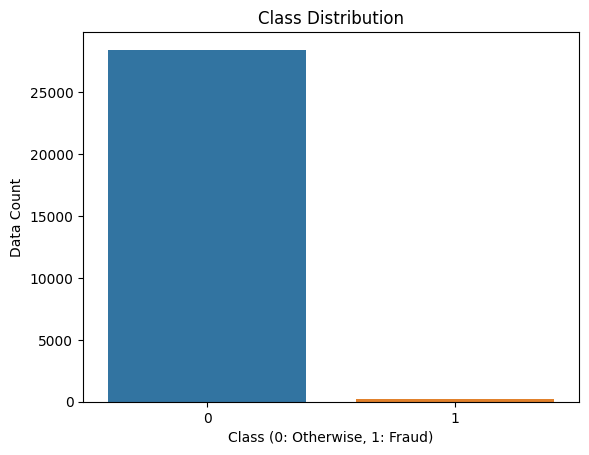

In [44]:
sns.countplot(x = data['Class'])
plt.title('Class Distribution')
plt.xlabel('Class (0: Otherwise, 1: Fraud)')
plt.ylabel('Data Count')
plt.show()

데이터 불균형이 매우 심하다. 

이는 모델이 모든 입력에 대해서 단순히 0으로 판단한다고 하더라도 높은 Accuracy를 낼 수 밖에 없을것이다.

이때, 사기를 사기가 아니라고 예측하면 안되기에, 관련있는 Recall 지표에도 더 집중해야한다.

따라서, 모델의 성능 개선을 위해서는 Precision과 Recall의 조화평균인 F1-Score를 고려해야한다.

[참고한글](https://eatchu.tistory.com/12)

## 불균형한 데이터를 Sampling으로 보완시도

언더샘플링 및 오버샘플링을 각각 진행한 후 각각 F1-Score를 비교하는 식으로 평가해보겠다.

[참고한글](https://casa-de-feel.tistory.com/15)

In [61]:
# 무작위로 데이터를 없애는 단순 샘플링방법이다.
X_under_train, Y_under_train = RandomUnderSampler().fit_resample(X_train, Y_train)

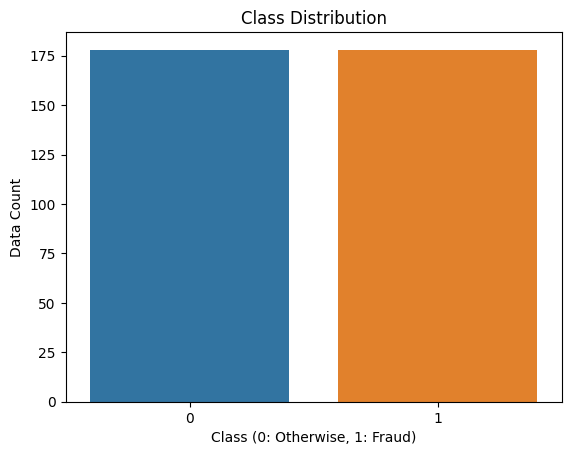

In [62]:
sns.countplot(x = Y_under_train)
plt.title('Class Distribution')
plt.xlabel('Class (0: Otherwise, 1: Fraud)')
plt.ylabel('Data Count')
plt.show()

In [63]:
model = LogisticRegression()
model.fit(X_under_train, Y_under_train)
pred = model.predict(X_test)

In [64]:
metrics(Y_test, pred)

:: Precision Score = 0.18452 ::
:: Recall    Score = 0.91176 ::
:: Accuracy  Score = 0.96095 ::
:: F1        Score = 0.30693 ::


In [65]:
# 토멕 링크는 서로 다른 클래스에 속하는 두 데이터가 아주 가까이 붙어있는것들을 이은 선이라고 한다.
# 경계선을 다수 클래스쪽으로 밀어붙이는 효과가 있다고 함.
X_under_train, Y_under_train = TomekLinks().fit_resample(X_train, Y_train)

model = LogisticRegression()
model.fit(X_under_train, Y_under_train)
pred = model.predict(X_test)

metrics(Y_test, pred)

:: Precision Score = 0.90164 ::
:: Recall    Score = 0.80882 ::
:: Accuracy  Score = 0.99735 ::
:: F1        Score = 0.85271 ::


언더샘플링 기법인 RandomSampling 그리고 TomekLink 방식 모두 사용해보았는데,

RandomSampling의 경우, 무작위로 데이터를 줄이기에 Precision가 큰 영향을 받게 되었고,

TomekLink의 경우 해당 데이터에는 적절하지 않은 것으로 보였다.

이어서, 오버샘플링 기법도 적용해보았다.

In [66]:
# SMOTE는 소수 범주에서 가상의 데이터를 생성하는 방법이라고 한다.
# 소수 범주에서 데이터 하나를 고른 후에, 가장 가까운 K개의 데이터중 하나를 골라 공식을 적용하여 데이터 생성.
smote = SMOTE(random_state=0)
X_over_train, Y_over_train = smote.fit_resample(X_train, Y_train)

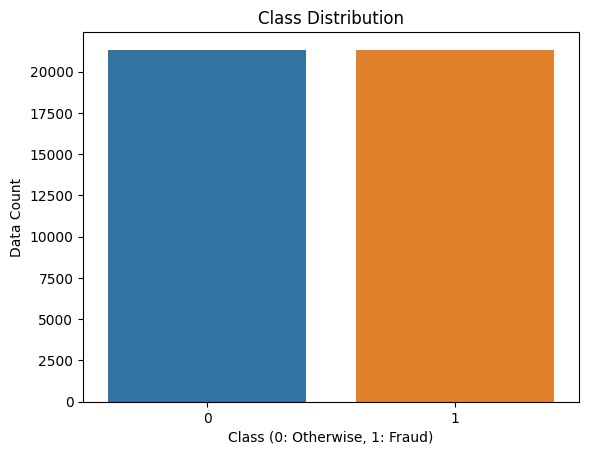

In [68]:
sns.countplot(x = Y_over_train)
plt.title('Class Distribution')
plt.xlabel('Class (0: Otherwise, 1: Fraud)')
plt.ylabel('Data Count')
plt.show()

In [69]:
model = LogisticRegression()
model.fit(X_over_train, Y_over_train)
pred = model.predict(X_test)

In [70]:
metrics(Y_test, pred)

:: Precision Score = 0.28638 ::
:: Recall    Score = 0.89706 ::
:: Accuracy  Score = 0.97782 ::
:: F1        Score = 0.43416 ::


아까 언더샘플링보단 낫긴 하지만 전혀 개선이 안된다 ..

ㅜㅜ Recall 및 Precision을 결정하는 Threshold를 잘 조절하면 F1-score의 개선이 이뤄질 수 있을 것 같은데..

제출 전날 저녁까지 계속 고민고민 했으나 방법을 잘 몰라서 여기까지 ㅠㅠ